In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False 

In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time 
tmp1 = 'https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query={key_word}&c_id=&c_name=&sm=tab_pge&kin_start='
html = tmp1 + '{num}1&kin_age=0'
response = urlopen(html.format(num=0, key_word=urllib.parse.quote('마케팅')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('ul', class_='lst_total _list')

In [3]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['    Q  문서 저장하기  Keep에 저장 Keep 바로가기    식품 마케팅 질문이요! 저희는 수제청을 만들어 스마트스토어로 팔고 있어요 식품마케팅으로 블로그 리뷰(체험단)하고 구매평 마케팅을 하려하는데 어느곳이 유명한곳인가요 절차가 어찌 될 까요     expert와 상담  A     온라인 마케팅온라인 마케팅  파블로체험단       블로그 운영 컨설팅 별점5.0상담 9 평균 40분 내 응답    식품 마케팅으로 체험단을 하는 것은 가장 기본이고... 식품마케팅에서 리뷰는 곧 해당 브랜드의 얼굴이기 때문에... 게다가 식품마케팅 단가도 저렴합니다 인당 1만원 내외로... 식품 마케팅 홍보 성과도 달라지게 됩니다 왜 리뷰가 중요한지 아셨다면 다음으로는 식품 마케팅으로 체험단을...  2일 전          Q온라인 통합 마케팅 어떤가요? 제 생각에는 블로그와 인스타 지식인 이런 온라인통합마케팅이 되야 효과가 좋을 것 같은데요 구매평도 그렇고 저희가 쇼핑몰인데 온라인통합마케팅을 모두 할 수 있는 대행사를 찾고 있어요 종합대행사인셈이죠 월 예산은 100정도 생각하고 있습니다 어디가 가능한가요?  2022.01.03.      이전 다음     관련 구매평 블로그        Q  문서 저장하기  Keep에 저장 Keep 바로가기    연세대 마케팅 연세대에 마케팅 학과가 있나요? 브랜드마케팅을 하는게 꿈인데     1:1  A    사회복지홍보      경영학과가 있습니다. 경영학 세부전공에 마케팅이 있으니 여러 과목중 마케팅과목 주로 선택하세요. 브랜드마케팅은 마케팅 수업중 잠시 몇시간 배우는 정도라 크게 직접적인 도움에는 크게 모자랄테니 관련 전공서적 추가 공부하시구요. © jontyson, 출처 Unsplash  2021.12.28.          Q심리학과 마케팅 제가 마케팅 쪽에서 일하고 싶은데 심리학과 나와도 가능할까요? 내공 100이요  2021.02.23.      이전 다음     관련 학과        Q  문서 저장하기  Keep에

# Naver Developers API
네이버에서 제공하는 개발자용 API를 이용하면 속도가 빠르다. https://developers.naver.com/main/

In [4]:
tmp1 = 'https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query={key_word}&c_id=&c_name=&sm=tab_pge&kin_start='
html = tmp1 + '{num}1&kin_age=0'
response = urlopen(html.format(num=0, key_word=urllib.parse.quote('마케팅')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('ul', class_='lst_total _list')
#tmp

In [5]:
from tqdm.notebook import tqdm
present_candi_text = []
for n in tqdm(range(0, 100)): # Naver Page View 100까지 있음 ㅠㅠ
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('마케팅')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('ul', class_='lst_total _list')
    for line in tmp:
        present_candi_text.append(line.text) 
    time.sleep(0.5)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
present_candi_text

In [7]:
len(present_candi_text)

100

In [8]:
import nltk
from konlpy.tag import Okt; t = Okt()

present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [ ]:
tokens_ko = t.morphs(present_text)
tokens_ko

In [10]:
ko = nltk.Text(tokens_ko, name='마케팅')
print(len(ko.tokens)) # 총 모은 단어
print(len(set(ko.tokens))) # 중복 단어 제거할 경우

124362
7994


In [11]:
ko = nltk.Text(tokens_ko, name='마케팅')
ko.vocab().most_common(10)

[('마케팅', 7518),
 ('.', 4186),
 ('...', 3078),
 ('에', 2644),
 ('을', 2521),
 ('이', 2306),
 ('저장', 2000),
 ('Keep', 2000),
 ('가', 1366),
 (',', 1224)]

In [12]:
ko.similar('마케팅')

온라인마케팅 광고 방법 곳 쪽 것 등 일 제품 상품 홍보 업종 전략 진행 사업 질문 기업 자격증 직업 업체


In [13]:
# 그중 가장 많이 사용된 단어를 보니 의미 없는 단어들도 보이므로 일일이 제거한다.
stop_words = [ '.', '...', '에', '을','이','저장','Keep','가', ',','를','은','?',
              '하기','Q','A','문서','바로가기','으로','1:1','의',
              '도','는', '하는', '적','들','입니다','하고','지식인',
              '수','것','에서','과','요','인', '!','곳',
              '로','관련','할','와', '상담','한','질문','있는','잘','합니다',
              '어떤','단','진행', '중', '있습니다','대해','좀',
              '안녕하세요','제','방법','서', '답변','1','많이','쪽',
              '어떻게', '인터넷','고','등','(', '전문가', '된','분', 
              '****','이나',')','님','하는데','해서','..','저','-', '저희',
              '있을까요','^^','어느','되는','걸','2021.09','5.0','가지',
             '게','2','생각','자','더','나','인데','도움','때', '2021.08',
             '/','~','점','만','말','있나요','다','??','대','해야',
             '2021.07','알','대한','해','및',"'",'까지','안','뭐','그리고',
             '그','때문','3','해주세요','2021.12','면','별','위','될',
             '드리겠습니다','인지','라는','28','몇','따라','에서는','비',
             '부터','expert','장','거','많습니다', '무슨','부탁드립니다',
             ':','하시는','하나','하나요','인가요','있어요', '이런','지',
             '!!','혹시','한번','설명', '"','이라고','드립니다','하면',
             '정도','....','이고','통해','에게','검색', '2021.10','2021.11',
             '2021.06','하여','경우','직접','글', '너무','하지만','ㅠㅠ',
             '내','있는데','하려고','같은','분들','20','에도','하려면','등등',
             '싶습니다','시','신','하시면','있어서','게시','바랍니다', 
             '아시','키','보시','볼', '또', '통한','됩니다','40분','★', 
             '25','이란','식','이라는','30','에서도','라','전','2021.05',
             '싶은데','전','라','있고','하','주','보다','이라', '하는지',
             '하게','할지','보고','언','9','시키는','건','하는데요','랑',
             '02','4','위해','있으면','개','하면서', '알려','또는','03',
             '건가', '해주는','그냥', '다음','했는데', '부','경','두','해보신',
             '있어','못', '근데','라고','받아','에는','정말','플루','알아보고',
             '같은데','대신','죠','14','주시','구','있는지','21','따로',
             '22','사실','영','시간','또한','13','높은','하니','19',':)','따져',
              '있게','26', '24','아니라','에요', '같습니다','감사하겠습니다','일단',
              '부탁드려요','29', '하는게','맞는', '아주','없습니다', '다수','입','신화',
              '마다','01','그래서','보니', '가능한', '있는데요','궁금해요','보통','하실', 
              '대부분', '27','아래', '이제', '알려주시면','16','까요','해볼까','이전',
              '여러','꼭', '달','이랑','자사','18', '여러가지', '좋습니다', '궁금합니다',
              '조금', '수많은','2021.04','자세한','같아요','뭔가', '주로','23','그런',
              '라면','절','만큼', '넓은','얼마','하더라구요','임','찾고','감사합니다','자체',
              '부탁드리겠습니다', '해보시면','거의','성','아니면', '가장', '많은',
              '좋은','무엇','다른','이번','우선','09','12','사','매우','봅니다','회사',
             ]

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='마케팅')
ko.vocab().most_common(50)

[('마케팅', 7518),
 ('광고', 840),
 ('블로그', 766),
 ('온라인', 617),
 ('바이럴', 604),
 ('업체', 542),
 ('효과', 456),
 ('홍보', 435),
 ('온라인마케팅', 384),
 ('체험', 297),
 ('추천', 269),
 ('인스타', 210),
 ('SNS', 195),
 ('리뷰', 190),
 ('인스타그램', 187),
 ('학과', 185),
 ('전략', 182),
 ('기업', 177),
 ('요즘', 172),
 ('알려주세요', 168),
 ('자격증', 155),
 ('비용', 155),
 ('일', 136),
 ('전문', 135),
 ('관심', 133),
 ('행사', 132),
 ('종류', 132),
 ('교육', 128),
 ('카페', 127),
 ('분야', 127),
 ('사업', 126),
 ('브랜드', 125),
 ('운영', 124),
 ('고민', 122),
 ('병원', 111),
 ('해보려고', 109),
 ('사람', 108),
 ('문의', 108),
 ('업종', 107),
 ('매출', 105),
 ('지금', 105),
 ('팀', 104),
 ('노출', 104),
 ('시작', 102),
 ('데이터', 101),
 ('정보', 99),
 ('소비자', 98),
 ('네트워크', 98),
 ('광고주', 95),
 ('직업', 95)]

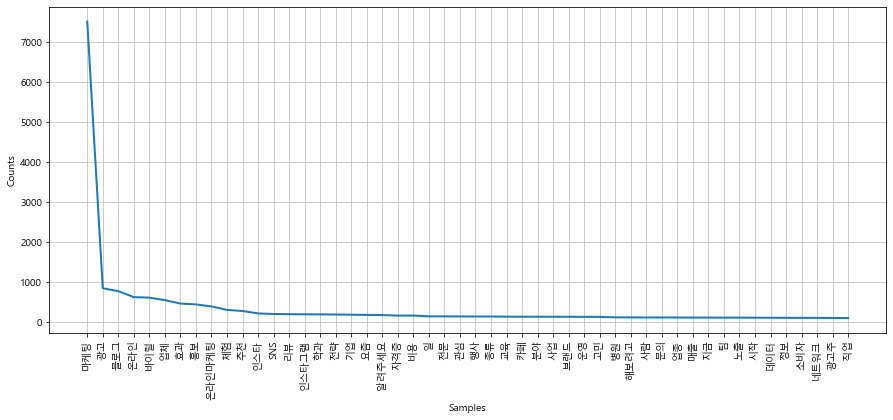

In [14]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

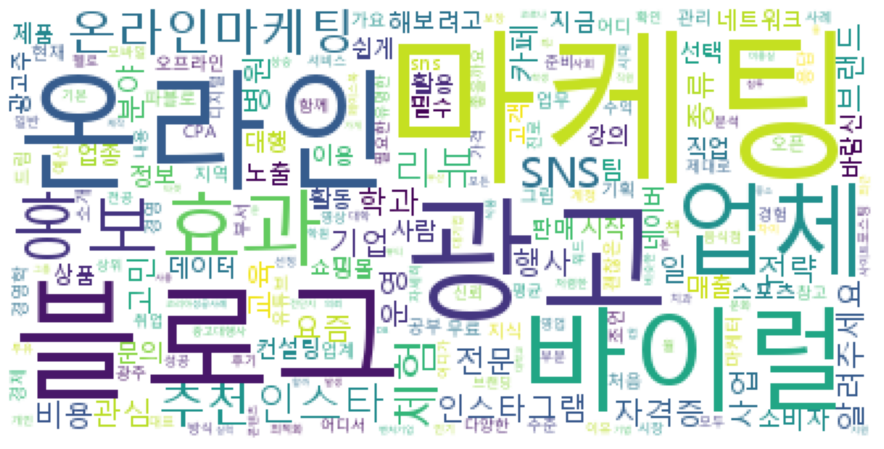

In [15]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
# for mac : font_path='/Library/Fonts/AppleGothic.ttf',
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
mask = np.array(Image.open('./data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [17]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

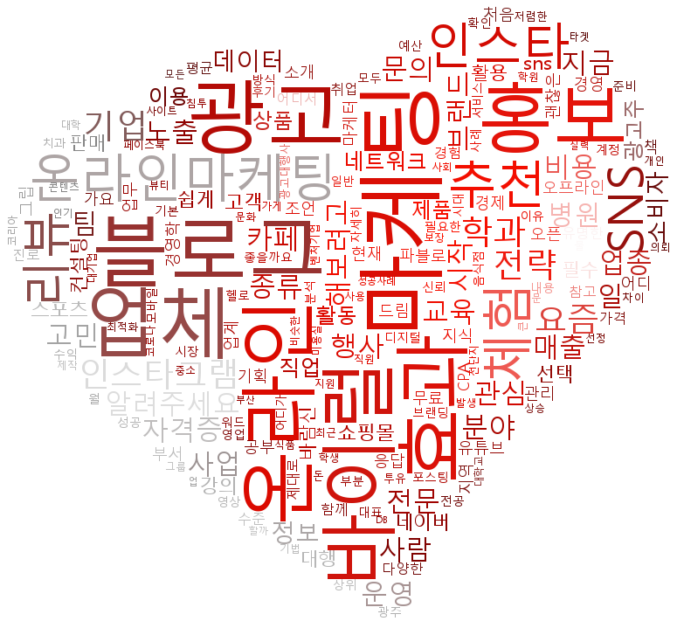

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
!pip install gensim

이번에는 자연어 처리에서 word2vec을 지원하는 gensim을 사용해본다.<br/>
조사나 어미 등을 제거하는 과정을 거친다

In [19]:
import gensim
from gensim.models import word2vec

In [20]:
twitter = Okt()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

In [21]:
# Word2Vec을 실행하고 그 결과를 저장한다.
data_file = 'marketing.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [22]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1, min_count=2, sg=1)
model.save('marketing.model')

In [23]:
# 저장한 파일을 읽는다.
model = word2vec.Word2Vec.load("marketing.model")

In [24]:
# '마케팅'과 유사한 단어를 물으니, 다음 단어가 뜬다.
model.wv.most_similar(positive=['마케팅'])

[('간접', 0.6218293905258179),
 ('한마디', 0.6145097613334656),
 ('jmr', 0.6127417683601379),
 ('배다', 0.6035882830619812),
 ('신문', 0.599800169467926),
 ('오션', 0.594994306564331),
 ('통', 0.5905056595802307),
 ('가시', 0.5890696048736572),
 ('미팅', 0.5811454057693481),
 ('리스크', 0.5807769298553467)]

In [25]:
model.wv.most_similar(positive=['자본금','소비'])

[('가시', 0.8225705623626709),
 ('한마디', 0.8193197250366211),
 ('TV', 0.8159825205802917),
 ('불러일으키다', 0.8131361603736877),
 ('척척', 0.8028626441955566),
 ('쌓이다', 0.79986172914505),
 ('박사', 0.7960852384567261),
 ('채다', 0.7900902032852173),
 ('큐레이터', 0.7888532876968384),
 ('여리다', 0.7883651256561279)]

In [26]:
# '자본금'에서 '소비'를 빼라고 했더니, 다음 단어가 뜹니다.
model.wv.most_similar(positive=['자본금'], negative=['소비'])

[('승무원', 0.5227257013320923),
 ('중심', 0.5161893367767334),
 ('자유', 0.5152320861816406),
 ('바뀌다', 0.5137532949447632),
 ('수행', 0.5136240720748901),
 ('편입', 0.5111185312271118),
 ('안내', 0.4933736026287079),
 ('경영', 0.4914062023162842),
 ('믹스', 0.48998433351516724),
 ('시각디자인', 0.48711463809013367)]

In [27]:
model.wv.most_similar(positive=['소비'], negative=['자본금'])

[('거들다', 0.39177900552749634),
 ('훌라', 0.38832342624664307),
 ('자시다', 0.34872421622276306),
 ('아주', 0.34488987922668457),
 ('이상하다', 0.343321830034256),
 ('쑝', 0.3417111337184906),
 ('계시', 0.3213561773300171),
 ('그리다', 0.31345832347869873),
 ('anne', 0.31204676628112793),
 ('분들', 0.3110809624195099)]